**Import Required Libraries**

In [1]:
import matplotlib.pyplot as plt
import scipy.io
import numpy as np
import pandas as pd
import os

In [2]:
from google.colab import drive

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
path=r'/content/drive/MyDrive/Data Cap4/archive/3rd_test/4th_test/txt'

In [5]:
filename = '2004.03.04.09.27.46'
dataset=pd.read_csv(os.path.join(path, filename), sep='\t',header=None)

In [6]:
dataset

,0,1,2,3
0,0.034,0.264,0.039,-0.046
1,0.103,0.083,-0.061,-0.012
2,0.095,-0.039,-0.007,0.039
3,0.000,0.110,0.022,-0.002
4,0.005,0.154,-0.127,-0.020
...,...,...,...,...
20475,-0.010,0.120,-0.076,-0.015
20476,0.117,-0.146,-0.046,0.024
20477,0.024,-0.127,-0.007,0.095
20478,-0.090,0.034,-0.017,0.037


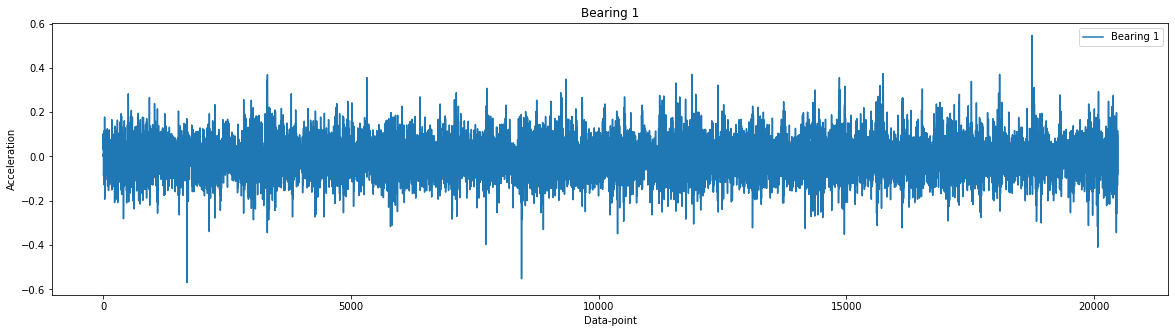

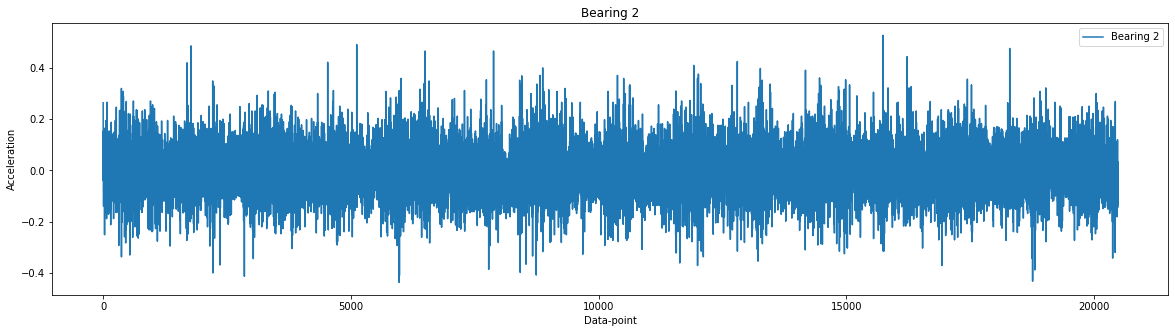

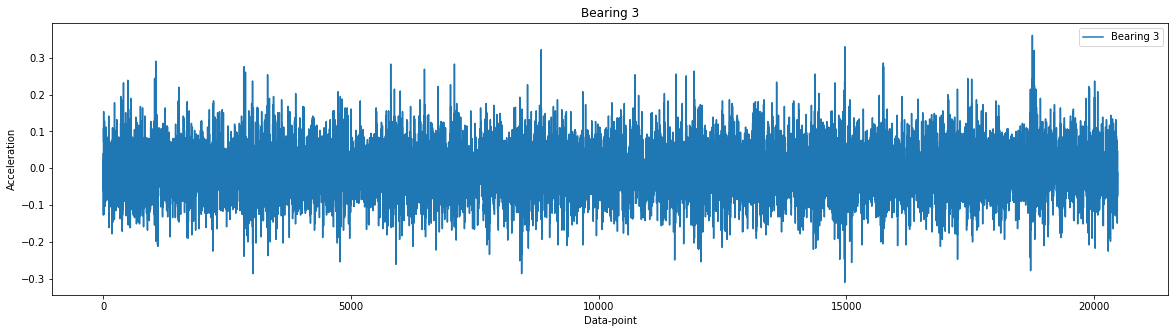

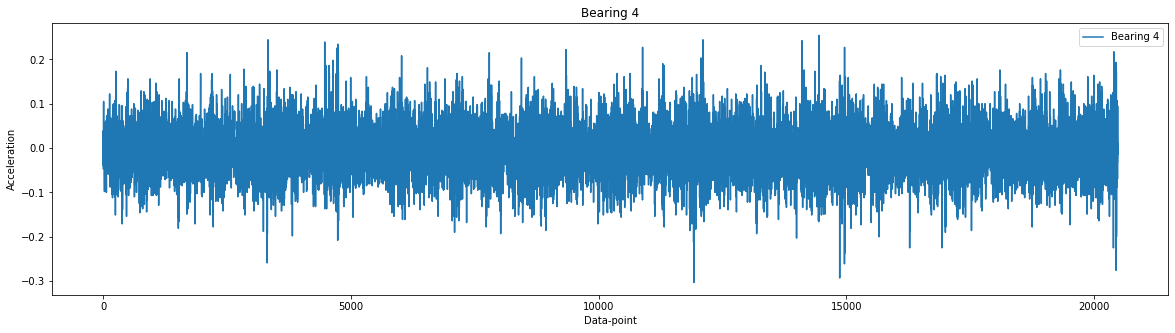

In [7]:
for i in [0,1,2,3]:
    
    df_bearing=np.array(dataset.iloc[:,i])
    
    plt.figure(figsize=(20, 5))
    plt.plot(df_bearing)

    plt.legend(['Bearing {}'.format(i+1)])

    plt.xlabel("Data-point")
    plt.ylabel("Acceleration")
    plt.title('Bearing {}'.format(i+1))
    plt.show()

In [8]:
bearing_no1=1

bearing_data1 = np.array(dataset.iloc[:,bearing_no1-1])

bearing_data1

array([ 0.034,  0.103,  0.095, ...,  0.024, -0.09 , -0.129])

In [9]:
bearing_no2=2

bearing_data2 = np.array(dataset.iloc[:,bearing_no2-1])

bearing_data2

array([ 0.264,  0.083, -0.039, ..., -0.127,  0.034, -0.137])

In [10]:
bearing_no3=3

bearing_data3 = np.array(dataset.iloc[:,bearing_no3-1])

bearing_data3

array([ 0.039, -0.061, -0.007, ..., -0.007, -0.017,  0.046])

In [11]:
bearing_no4=4

bearing_data4 = np.array(dataset.iloc[:,bearing_no4-1])

bearing_data4

array([-0.046, -0.012,  0.039, ...,  0.095,  0.037, -0.068])

In [12]:
temp1 = bearing_data1
print(temp1)

temp2 = bearing_data2
print(temp2)

temp3 = bearing_data3
print(temp3)

temp4 = bearing_data4
print(temp4)

[ 0.034  0.103  0.095 ...  0.024 -0.09  -0.129]
[ 0.264  0.083 -0.039 ... -0.127  0.034 -0.137]
[ 0.039 -0.061 -0.007 ... -0.007 -0.017  0.046]
[-0.046 -0.012  0.039 ...  0.095  0.037 -0.068]


In [13]:
# extracting features from this bearing data

feature_matrix1=np.zeros((1,9))
feature_matrix1

feature_matrix2=np.zeros((1,9))
feature_matrix2

feature_matrix3=np.zeros((1,9))
feature_matrix3

feature_matrix4=np.zeros((1,9))
feature_matrix4

array([[0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [14]:
'''We will calculate following time domain features.

Maximum value
Minimum value
Mean value
Standard deviation (Unbiased std)
Root mean square value (RMS)
Skewness
Kurtosis
Crest factor = Max/RMS
Form factor = RMS/Mean'''

def compute_skewness(x):
    
    n = len(x)
    third_moment = np.sum((x - np.mean(x))**3) / n
    s_3 = np.std(x, ddof = 1) ** 3
    return third_moment/s_3
def compute_kurtosis(x):
    
    n = len(x)
    fourth_moment = np.sum((x - np.mean(x))**4) / n
    s_4 = np.std(x, ddof = 1) ** 4
    return fourth_moment / s_4 - 3

In [15]:
feature_matrix1[0,0] = np.max(temp1)
feature_matrix1[0,1] = np.min(temp1)
feature_matrix1[0,2] = np.mean(temp1)
feature_matrix1[0,3] = np.std(temp1, ddof = 1)
feature_matrix1[0,4] = np.sqrt(np.mean(temp1 ** 2))
feature_matrix1[0,5] = compute_skewness(temp1)
feature_matrix1[0,6] = compute_kurtosis(temp1)
feature_matrix1[0,7] = feature_matrix1[0,0]/feature_matrix1[0,4]
feature_matrix1[0,8] = feature_matrix1[0,4]/feature_matrix1[0,2]


feature_matrix2[0,0] = np.max(temp2)
feature_matrix2[0,1] = np.min(temp2)
feature_matrix2[0,2] = np.mean(temp2)
feature_matrix2[0,3] = np.std(temp2, ddof = 1)
feature_matrix2[0,4] = np.sqrt(np.mean(temp2 ** 2))
feature_matrix2[0,5] = compute_skewness(temp2)
feature_matrix2[0,6] = compute_kurtosis(temp2)
feature_matrix2[0,7] = feature_matrix2[0,0]/feature_matrix2[0,4]
feature_matrix2[0,8] = feature_matrix2[0,4]/feature_matrix2[0,2]


feature_matrix3[0,0] = np.max(temp3)
feature_matrix3[0,1] = np.min(temp3)
feature_matrix3[0,2] = np.mean(temp3)
feature_matrix3[0,3] = np.std(temp3, ddof = 1)
feature_matrix3[0,4] = np.sqrt(np.mean(temp3 ** 2))
feature_matrix3[0,5] = compute_skewness(temp3)
feature_matrix3[0,6] = compute_kurtosis(temp3)
feature_matrix3[0,7] = feature_matrix3[0,0]/feature_matrix3[0,4]
feature_matrix3[0,8] = feature_matrix3[0,4]/feature_matrix3[0,2]


feature_matrix4[0,0] = np.max(temp4)
feature_matrix4[0,1] = np.min(temp4)
feature_matrix4[0,2] = np.mean(temp4)
feature_matrix4[0,3] = np.std(temp4, ddof = 1)
feature_matrix4[0,4] = np.sqrt(np.mean(temp4 ** 2))
feature_matrix4[0,5] = compute_skewness(temp4)
feature_matrix4[0,6] = compute_kurtosis(temp4)
feature_matrix4[0,7] = feature_matrix4[0,0]/feature_matrix4[0,4]
feature_matrix4[0,8] = feature_matrix4[0,4]/feature_matrix4[0,2]

In [16]:
feature_matrix1

array([[ 5.47000000e-01, -5.69000000e-01, -4.71459961e-03,
         7.96307733e-02,  7.97682762e-02,  3.08747370e-02,
         1.29230113e+00,  6.85736268e+00, -1.69194169e+01]])

In [17]:
feature_matrix2

array([[ 5.27000000e-01, -4.37000000e-01, -3.90473633e-03,
         9.66431689e-02,  9.67196620e-02,  1.52035369e-01,
         7.76081804e-01,  5.44873699e+00, -2.47698318e+01]])

In [18]:
feature_matrix3

array([[ 3.61000000e-01, -3.10000000e-01, -5.14794922e-03,
         6.61917341e-02,  6.63900076e-02,  8.34485268e-02,
         5.91902233e-01,  5.43756528e+00, -1.28963991e+01]])

In [19]:
feature_matrix4

array([[ 2.54000000e-01, -3.03000000e-01, -4.33085938e-03,
         5.53246654e-02,  5.54925715e-02,  3.88449576e-02,
         5.59706097e-01,  4.57718922e+00, -1.28132933e+01]])

In [20]:
df1 = pd.DataFrame(feature_matrix1)
df1.index=[filename[:-3]]
df1

,0,1,2,3,4,5,6,7,8
2004.03.04.09.27,0.547,-0.569,-0.004715,0.079631,0.079768,0.030875,1.292301,6.857363,-16.919417


In [21]:
df2 = pd.DataFrame(feature_matrix2)
df2.index=[filename[:-3]]
df2

,0,1,2,3,4,5,6,7,8
2004.03.04.09.27,0.527,-0.437,-0.003905,0.096643,0.09672,0.152035,0.776082,5.448737,-24.769832


In [22]:
df3 = pd.DataFrame(feature_matrix3)
df3.index=[filename[:-3]]
df3

,0,1,2,3,4,5,6,7,8
2004.03.04.09.27,0.361,-0.31,-0.005148,0.066192,0.06639,0.083449,0.591902,5.437565,-12.896399


In [23]:
df4 = pd.DataFrame(feature_matrix4)
df4.index=[filename[:-3]]
df4

,0,1,2,3,4,5,6,7,8
2004.03.04.09.27,0.254,-0.303,-0.004331,0.055325,0.055493,0.038845,0.559706,4.577189,-12.813293


In [24]:
Time_feature_matrix1=pd.DataFrame()

test_set=3

bearing_no1=1 # Provide the Bearing number [1,2,3,4] of the Test set

path=r'/content/drive/MyDrive/Data Cap4/archive/3rd_test/4th_test/txt'
for filename in os.listdir(path):
    
    dataset=pd.read_csv(os.path.join(path, filename), sep='\t',header=None)

    bearing_data1 = np.array(dataset.iloc[:,bearing_no1-1])

    feature_matrix1=np.zeros((1,9))
    temp1 = bearing_data1
    feature_matrix1[0,0] = np.max(temp1)
    feature_matrix1[0,1] = np.min(temp1)
    feature_matrix1[0,2] = np.mean(temp1)
    feature_matrix1[0,3] = np.std(temp1, ddof = 1)
    feature_matrix1[0,4] = np.sqrt(np.mean(temp1 ** 2))
    feature_matrix1[0,5] = compute_skewness(temp1)
    feature_matrix1[0,6] = compute_kurtosis(temp1)
    feature_matrix1[0,7] = feature_matrix1[0,0]/feature_matrix1[0,4]
    feature_matrix1[0,8] = feature_matrix1[0,4]/feature_matrix1[0,2]
    
    df1 = pd.DataFrame(feature_matrix1)
    df1.index=[filename[:-3]]
    
    Time_feature_matrix1 = Time_feature_matrix1.append(df1)

In [25]:
Time_feature_matrix1

,0,1,2,3,4,5,6,7,8
2004.04.10.21.21,0.361,-0.322,-0.002407,0.072940,0.072978,0.016500,0.394631,4.946711,-30.322888
2004.04.10.21.01,0.439,-0.486,-0.002430,0.076841,0.076877,0.046909,0.631241,5.710389,-31.638324
2004.04.10.20.11,0.352,-0.337,-0.002329,0.074972,0.075006,0.048329,0.479770,4.692967,-32.199047
2004.04.10.23.21,0.535,-0.386,-0.002098,0.076879,0.076906,0.033503,0.563911,6.956557,-36.661052
2004.04.10.22.41,0.398,-0.417,-0.002055,0.077673,0.077698,0.052577,0.561965,5.122385,-37.806998
...,...,...,...,...,...,...,...,...,...
2004.03.06.14.02,0.347,-0.364,-0.002244,0.073527,0.073560,0.012308,0.455900,4.717252,-32.777880
2004.03.06.13.22,0.386,-0.347,-0.001871,0.074128,0.074149,0.025987,0.541293,5.205700,-39.623788
2004.03.06.14.42,0.342,-0.376,-0.002539,0.073429,0.073472,0.030042,0.393410,4.654862,-28.940390
2004.03.06.15.02,0.437,-0.347,-0.001716,0.073086,0.073104,0.069635,0.459811,5.977791,-42.608240


In [26]:
Time_feature_matrix1.columns = ['Max','Min','Mean','Std','RMS','Skewness','Kurtosis','Crest Factor','Form Factor']
Time_feature_matrix1.index = pd.to_datetime(Time_feature_matrix1.index, format='%Y.%m.%d.%H.%M')

Time_feature_matrix1 = Time_feature_matrix1.sort_index()

Time_feature_matrix1.to_csv('Time_feature_matrix1_Bearing_{}_Test_{}.csv'.format(bearing_no1,test_set))

Time_feature_matrix1

,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,Crest Factor,Form Factor
2004-03-04 09:27:00,0.547,-0.569,-0.004715,0.079631,0.079768,0.030875,1.292301,6.857363,-16.919417
2004-03-04 09:32:00,0.491,-0.461,-0.005102,0.078514,0.078678,-0.013806,1.156631,6.240622,-15.422493
2004-03-04 09:42:00,0.515,-0.454,-0.002242,0.079785,0.079815,0.033417,0.889743,6.452419,-35.600825
2004-03-04 09:52:00,0.520,-0.552,-0.002552,0.081044,0.081082,-0.027038,1.181453,6.413225,-31.769056
2004-03-04 10:02:00,0.369,-0.381,-0.002534,0.079126,0.079165,-0.017774,0.585448,4.661149,-31.240121
...,...,...,...,...,...,...,...,...,...
2004-04-18 02:02:00,0.742,-0.667,-0.002483,0.154769,0.154785,0.161841,0.284098,4.793745,-62.334039
2004-04-18 02:12:00,0.613,-0.576,-0.001885,0.137860,0.137870,0.109001,0.035104,4.446217,-73.121270
2004-04-18 02:22:00,0.754,-0.688,-0.002402,0.147165,0.147181,0.291569,0.552675,5.122955,-61.285383
2004-04-18 02:32:00,0.933,-0.632,-0.003033,0.154456,0.154482,0.440079,1.093348,6.039545,-50.941742


In [27]:
Time_feature_matrix2=pd.DataFrame()

test_set=3

bearing_no2=2 # Provide the Bearing number [1,2,3,4] of the Test set

path=r'/content/drive/MyDrive/Data Cap4/archive/3rd_test/4th_test/txt'
for filename in os.listdir(path):
    
    dataset=pd.read_csv(os.path.join(path, filename), sep='\t',header=None)

    bearing_data2 = np.array(dataset.iloc[:,bearing_no2-1])

    feature_matrix2=np.zeros((1,9))
    temp2 = bearing_data2
    feature_matrix2[0,0] = np.max(temp2)
    feature_matrix2[0,1] = np.min(temp2)
    feature_matrix2[0,2] = np.mean(temp2)
    feature_matrix2[0,3] = np.std(temp2, ddof = 1)
    feature_matrix2[0,4] = np.sqrt(np.mean(temp2 ** 2))
    feature_matrix2[0,5] = compute_skewness(temp2)
    feature_matrix2[0,6] = compute_kurtosis(temp2)
    feature_matrix2[0,7] = feature_matrix2[0,0]/feature_matrix2[0,4]
    feature_matrix2[0,8] = feature_matrix2[0,4]/feature_matrix2[0,2]
    
    df2 = pd.DataFrame(feature_matrix2)
    df2.index=[filename[:-3]]
    
    Time_feature_matrix2 = Time_feature_matrix2.append(df2)

In [28]:
Time_feature_matrix2

,0,1,2,3,4,5,6,7,8
2004.04.10.21.21,0.374,-0.361,-0.002053,0.076000,0.076026,0.099595,0.195000,4.919391,-37.039817
2004.04.10.21.01,0.410,-0.403,-0.002324,0.076842,0.076875,0.123698,0.182247,5.333344,-33.072786
2004.04.10.20.11,0.496,-0.337,-0.002194,0.077612,0.077641,0.120096,0.156775,6.388358,-35.392803
2004.04.10.23.21,0.408,-0.364,-0.002219,0.077014,0.077044,0.127413,0.204067,5.295695,-34.717049
2004.04.10.22.41,0.364,-0.381,-0.002134,0.078013,0.078040,0.141463,0.143992,4.664272,-36.575135
...,...,...,...,...,...,...,...,...,...
2004.03.06.14.02,0.415,-0.398,-0.002039,0.085645,0.085667,0.133456,0.279497,4.844313,-42.013164
2004.03.06.13.22,0.383,-0.459,-0.002038,0.084634,0.084656,0.125240,0.258222,4.524174,-41.532203
2004.03.06.14.42,0.356,-0.425,-0.001590,0.085872,0.085884,0.120595,0.145921,4.145108,-54.020642
2004.03.06.15.02,0.442,-0.347,-0.002105,0.084946,0.084970,0.127273,0.112228,5.201844,-40.369850


In [29]:
Time_feature_matrix2.columns = ['Max','Min','Mean','Std','RMS','Skewness','Kurtosis','Crest Factor','Form Factor']
Time_feature_matrix2.index = pd.to_datetime(Time_feature_matrix2.index, format='%Y.%m.%d.%H.%M')

Time_feature_matrix2 = Time_feature_matrix2.sort_index()

Time_feature_matrix2.to_csv('Time_feature_matrix2_Bearing_{}_Test_{}.csv'.format(bearing_no2,test_set))

Time_feature_matrix2

,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,Crest Factor,Form Factor
2004-03-04 09:27:00,0.527,-0.437,-0.003905,0.096643,0.096720,0.152035,0.776082,5.448737,-24.769832
2004-03-04 09:32:00,0.537,-0.479,-0.005115,0.091868,0.092008,0.146235,0.701574,5.836461,-17.987875
2004-03-04 09:42:00,0.496,-0.596,-0.002249,0.093405,0.093430,0.171792,0.936283,5.308774,-41.542582
2004-03-04 09:52:00,0.476,-0.513,-0.001115,0.092799,0.092803,0.166062,0.379024,5.129135,-83.228634
2004-03-04 10:02:00,0.518,-0.562,-0.000780,0.092828,0.092829,0.145970,0.503687,5.580131,-119.067164
...,...,...,...,...,...,...,...,...,...
2004-04-18 02:02:00,0.872,-0.886,-0.001246,0.234438,0.234436,0.076449,-0.102991,3.719571,-188.084871
2004-04-18 02:12:00,0.891,-0.818,-0.002077,0.207223,0.207229,-0.016977,-0.040071,4.299600,-99.779970
2004-04-18 02:22:00,0.864,-0.847,-0.002420,0.250652,0.250657,-0.029070,-0.230784,3.446939,-103.563982
2004-04-18 02:32:00,0.962,-1.292,-0.002095,0.257198,0.257200,-0.156068,0.658018,3.740276,-122.750315


In [30]:
Time_feature_matrix3=pd.DataFrame()

test_set=3

bearing_no3=3 # Provide the Bearing number [1,2,3,4] of the Test set

path=r'/content/drive/MyDrive/Data Cap4/archive/3rd_test/4th_test/txt'
for filename in os.listdir(path):
    
    dataset=pd.read_csv(os.path.join(path, filename), sep='\t',header=None)

    bearing_data3 = np.array(dataset.iloc[:,bearing_no3-1])

    feature_matrix3=np.zeros((1,9))
    temp3 = bearing_data3
    feature_matrix3[0,0] = np.max(temp3)
    feature_matrix3[0,1] = np.min(temp3)
    feature_matrix3[0,2] = np.mean(temp3)
    feature_matrix3[0,3] = np.std(temp3, ddof = 1)
    feature_matrix3[0,4] = np.sqrt(np.mean(temp3 ** 2))
    feature_matrix3[0,5] = compute_skewness(temp3)
    feature_matrix3[0,6] = compute_kurtosis(temp3)
    feature_matrix3[0,7] = feature_matrix3[0,0]/feature_matrix3[0,4]
    feature_matrix3[0,8] = feature_matrix3[0,4]/feature_matrix3[0,2]
    
    df3 = pd.DataFrame(feature_matrix3)
    df3.index=[filename[:-3]]
    
    Time_feature_matrix3 = Time_feature_matrix3.append(df3)

In [31]:
Time_feature_matrix3

,0,1,2,3,4,5,6,7,8
2004.04.10.21.21,0.310,-0.278,-0.002170,0.069824,0.069856,0.001405,0.056269,4.437680,-32.195188
2004.04.10.21.01,0.278,-0.403,-0.002946,0.069819,0.069879,-0.010146,0.120316,3.978305,-23.720387
2004.04.10.20.11,0.278,-0.305,-0.002236,0.068881,0.068915,-0.050129,0.205604,4.033949,-30.824260
2004.04.10.23.21,0.332,-0.393,-0.001952,0.069207,0.069233,0.016028,0.198615,4.795406,-35.462327
2004.04.10.22.41,0.332,-0.320,-0.001978,0.069199,0.069226,0.041693,0.202435,4.795914,-34.995559
...,...,...,...,...,...,...,...,...,...
2004.03.06.14.02,0.264,-0.271,-0.001503,0.065435,0.065450,0.010646,0.113962,4.033598,-43.558347
2004.03.06.13.22,0.254,-0.276,-0.002660,0.064859,0.064912,-0.003072,0.109333,3.912964,-24.402634
2004.03.06.14.42,0.264,-0.269,-0.001933,0.064085,0.064112,0.025985,0.082451,4.117787,-33.171210
2004.03.06.15.02,0.259,-0.261,-0.002249,0.067280,0.067316,0.013814,0.082567,3.847534,-29.933743


In [32]:
Time_feature_matrix3.columns = ['Max','Min','Mean','Std','RMS','Skewness','Kurtosis','Crest Factor','Form Factor']
Time_feature_matrix3.index = pd.to_datetime(Time_feature_matrix3.index, format='%Y.%m.%d.%H.%M')

Time_feature_matrix3 = Time_feature_matrix3.sort_index()

Time_feature_matrix3.to_csv('Time_feature_matrix3_Bearing_{}_Test_{}.csv'.format(bearing_no3,test_set))

Time_feature_matrix3

,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,Crest Factor,Form Factor
2004-03-04 09:27:00,0.361,-0.310,-0.005148,0.066192,0.066390,0.083449,0.591902,5.437565,-12.896399
2004-03-04 09:32:00,0.295,-0.295,-0.006310,0.065986,0.066285,0.011828,0.359751,4.450449,-10.505622
2004-03-04 09:42:00,0.286,-0.286,-0.001293,0.069176,0.069186,0.049056,0.213724,4.133782,-53.519544
2004-03-04 09:52:00,0.349,-0.310,-0.002280,0.068600,0.068637,0.002209,0.299035,5.084751,-30.099513
2004-03-04 10:02:00,0.388,-0.374,-0.001727,0.067449,0.067469,0.031884,0.395754,5.750781,-39.058344
...,...,...,...,...,...,...,...,...,...
2004-04-18 02:02:00,3.167,-5.000,0.017613,0.495062,0.495363,-1.648364,16.742241,6.393285,28.124430
2004-04-18 02:12:00,2.378,-3.899,-0.002114,0.454472,0.454466,-0.656841,5.707273,5.232514,-214.967877
2004-04-18 02:22:00,4.346,-5.000,-0.079840,0.584635,0.590047,-0.426006,12.660025,7.365514,-7.390347
2004-04-18 02:32:00,4.998,-5.000,0.052137,0.756990,0.758765,-0.220131,7.058920,6.587018,14.553238


In [33]:
Time_feature_matrix4=pd.DataFrame()

test_set=3

bearing_no4=4 # Provide the Bearing number [1,2,3,4] of the Test set

path=r'/content/drive/MyDrive/Data Cap4/archive/3rd_test/4th_test/txt'
for filename in os.listdir(path):
    
    dataset=pd.read_csv(os.path.join(path, filename), sep='\t',header=None)

    bearing_data4 = np.array(dataset.iloc[:,bearing_no4-1])

    feature_matrix4=np.zeros((1,9))
    temp4 = bearing_data4
    feature_matrix4[0,0] = np.max(temp4)
    feature_matrix4[0,1] = np.min(temp4)
    feature_matrix4[0,2] = np.mean(temp4)
    feature_matrix4[0,3] = np.std(temp4, ddof = 1)
    feature_matrix4[0,4] = np.sqrt(np.mean(temp4 ** 2))
    feature_matrix4[0,5] = compute_skewness(temp4)
    feature_matrix4[0,6] = compute_kurtosis(temp4)
    feature_matrix4[0,7] = feature_matrix4[0,0]/feature_matrix4[0,4]
    feature_matrix4[0,8] = feature_matrix4[0,4]/feature_matrix4[0,2]
    
    df4 = pd.DataFrame(feature_matrix4)
    df4.index=[filename[:-3]]
    
    Time_feature_matrix4 = Time_feature_matrix4.append(df4)

In [34]:
Time_feature_matrix4

,0,1,2,3,4,5,6,7,8
2004.04.10.21.21,0.237,-0.259,-0.003598,0.054515,0.054632,0.032080,0.214667,4.338113,-15.184218
2004.04.10.21.01,0.310,-0.217,-0.003533,0.055920,0.056031,0.057503,0.238465,5.532692,-15.857641
2004.04.10.20.11,0.269,-0.305,-0.003190,0.055495,0.055585,0.019521,0.280053,4.839419,-17.427276
2004.04.10.23.21,0.239,-0.259,-0.003289,0.055075,0.055172,0.020488,0.234526,4.331889,-16.775949
2004.04.10.22.41,0.239,-0.251,-0.003635,0.056042,0.056158,0.004073,0.166674,4.255831,-15.449893
...,...,...,...,...,...,...,...,...,...
2004.03.06.14.02,0.210,-0.229,-0.003383,0.050942,0.051053,-0.004610,0.210320,4.113404,-15.091983
2004.03.06.13.22,0.222,-0.264,-0.003583,0.050884,0.051009,0.016937,0.349642,4.352164,-14.236975
2004.03.06.14.42,0.208,-0.205,-0.003328,0.050902,0.051010,0.044793,0.163958,4.077669,-15.328832
2004.03.06.15.02,0.239,-0.232,-0.003305,0.051638,0.051742,0.026397,0.210408,4.619029,-15.654060


In [35]:
Time_feature_matrix4.columns = ['Max','Min','Mean','Std','RMS','Skewness','Kurtosis','Crest Factor','Form Factor']
Time_feature_matrix4.index = pd.to_datetime(Time_feature_matrix4.index, format='%Y.%m.%d.%H.%M')

Time_feature_matrix4 = Time_feature_matrix4.sort_index()

Time_feature_matrix4.to_csv('Time_feature_matrix4_Bearing_{}_Test_{}.csv'.format(bearing_no4,test_set))

Time_feature_matrix4

,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,Crest Factor,Form Factor
2004-03-04 09:27:00,0.254,-0.303,-0.004331,0.055325,0.055493,0.038845,0.559706,4.577189,-12.813293
2004-03-04 09:32:00,0.212,-0.249,-0.006725,0.052926,0.053351,0.013904,0.355708,3.973709,-7.932665
2004-03-04 09:42:00,0.278,-0.278,-0.003200,0.052607,0.052703,0.034235,0.477955,5.274828,-16.469227
2004-03-04 09:52:00,0.269,-0.300,-0.004379,0.054671,0.054844,0.007403,0.341732,4.904798,-12.524926
2004-03-04 10:02:00,0.227,-0.247,-0.003443,0.053805,0.053914,0.023473,0.261460,4.210398,-15.660536
...,...,...,...,...,...,...,...,...,...
2004-04-18 02:02:00,0.867,-0.955,-0.003682,0.248059,0.248081,-0.026558,0.022271,3.494830,-67.379632
2004-04-18 02:12:00,0.918,-0.813,-0.003608,0.253635,0.253654,0.104431,-0.257887,3.619096,-70.304147
2004-04-18 02:22:00,1.082,-1.104,-0.003425,0.279849,0.279863,0.002889,0.030199,3.866172,-81.701455
2004-04-18 02:32:00,0.881,-0.969,-0.003452,0.282160,0.282174,-0.108601,-0.486148,3.122183,-81.743400


In [36]:
df1 = pd.read_csv("Time_feature_matrix1_Bearing_1_Test_3.csv")
df1 = pd.read_csv("Time_feature_matrix1_Bearing_1_Test_3.csv",index_col='Unnamed: 0')
df1.index = pd.to_datetime(df1.index)
df1

,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,Crest Factor,Form Factor
2004-03-04 09:27:00,0.547,-0.569,-0.004715,0.079631,0.079768,0.030875,1.292301,6.857363,-16.919417
2004-03-04 09:32:00,0.491,-0.461,-0.005102,0.078514,0.078678,-0.013806,1.156631,6.240622,-15.422493
2004-03-04 09:42:00,0.515,-0.454,-0.002242,0.079785,0.079815,0.033417,0.889743,6.452419,-35.600825
2004-03-04 09:52:00,0.520,-0.552,-0.002552,0.081044,0.081082,-0.027038,1.181453,6.413225,-31.769056
2004-03-04 10:02:00,0.369,-0.381,-0.002534,0.079126,0.079165,-0.017774,0.585448,4.661149,-31.240121
...,...,...,...,...,...,...,...,...,...
2004-04-18 02:02:00,0.742,-0.667,-0.002483,0.154769,0.154785,0.161841,0.284098,4.793745,-62.334039
2004-04-18 02:12:00,0.613,-0.576,-0.001885,0.137860,0.137870,0.109001,0.035104,4.446217,-73.121270
2004-04-18 02:22:00,0.754,-0.688,-0.002402,0.147165,0.147181,0.291569,0.552675,5.122955,-61.285383
2004-04-18 02:32:00,0.933,-0.632,-0.003033,0.154456,0.154482,0.440079,1.093348,6.039545,-50.941742


In [37]:
df2 = pd.read_csv("Time_feature_matrix2_Bearing_2_Test_3.csv")
df2 = pd.read_csv("Time_feature_matrix2_Bearing_2_Test_3.csv",index_col='Unnamed: 0')
df2.index = pd.to_datetime(df2.index)
df2

,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,Crest Factor,Form Factor
2004-03-04 09:27:00,0.527,-0.437,-0.003905,0.096643,0.096720,0.152035,0.776082,5.448737,-24.769832
2004-03-04 09:32:00,0.537,-0.479,-0.005115,0.091868,0.092008,0.146235,0.701574,5.836461,-17.987875
2004-03-04 09:42:00,0.496,-0.596,-0.002249,0.093405,0.093430,0.171792,0.936283,5.308774,-41.542582
2004-03-04 09:52:00,0.476,-0.513,-0.001115,0.092799,0.092803,0.166062,0.379024,5.129135,-83.228634
2004-03-04 10:02:00,0.518,-0.562,-0.000780,0.092828,0.092829,0.145970,0.503687,5.580131,-119.067164
...,...,...,...,...,...,...,...,...,...
2004-04-18 02:02:00,0.872,-0.886,-0.001246,0.234438,0.234436,0.076449,-0.102991,3.719571,-188.084871
2004-04-18 02:12:00,0.891,-0.818,-0.002077,0.207223,0.207229,-0.016977,-0.040071,4.299600,-99.779970
2004-04-18 02:22:00,0.864,-0.847,-0.002420,0.250652,0.250657,-0.029070,-0.230784,3.446939,-103.563982
2004-04-18 02:32:00,0.962,-1.292,-0.002095,0.257198,0.257200,-0.156068,0.658018,3.740276,-122.750315


In [38]:
df3 = pd.read_csv("Time_feature_matrix3_Bearing_3_Test_3.csv")
df3 = pd.read_csv("Time_feature_matrix3_Bearing_3_Test_3.csv",index_col='Unnamed: 0')
df3.index = pd.to_datetime(df3.index)
df3

,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,Crest Factor,Form Factor
2004-03-04 09:27:00,0.361,-0.310,-0.005148,0.066192,0.066390,0.083449,0.591902,5.437565,-12.896399
2004-03-04 09:32:00,0.295,-0.295,-0.006310,0.065986,0.066285,0.011828,0.359751,4.450449,-10.505622
2004-03-04 09:42:00,0.286,-0.286,-0.001293,0.069176,0.069186,0.049056,0.213724,4.133782,-53.519544
2004-03-04 09:52:00,0.349,-0.310,-0.002280,0.068600,0.068637,0.002209,0.299035,5.084751,-30.099513
2004-03-04 10:02:00,0.388,-0.374,-0.001727,0.067449,0.067469,0.031884,0.395754,5.750781,-39.058344
...,...,...,...,...,...,...,...,...,...
2004-04-18 02:02:00,3.167,-5.000,0.017613,0.495062,0.495363,-1.648364,16.742241,6.393285,28.124430
2004-04-18 02:12:00,2.378,-3.899,-0.002114,0.454472,0.454466,-0.656841,5.707273,5.232514,-214.967877
2004-04-18 02:22:00,4.346,-5.000,-0.079840,0.584635,0.590047,-0.426006,12.660025,7.365514,-7.390347
2004-04-18 02:32:00,4.998,-5.000,0.052137,0.756990,0.758765,-0.220131,7.058920,6.587018,14.553238


In [39]:
df4 = pd.read_csv("Time_feature_matrix4_Bearing_4_Test_3.csv")
df4 = pd.read_csv("Time_feature_matrix4_Bearing_4_Test_3.csv",index_col='Unnamed: 0')
df4.index = pd.to_datetime(df4.index)
df4

,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,Crest Factor,Form Factor
2004-03-04 09:27:00,0.254,-0.303,-0.004331,0.055325,0.055493,0.038845,0.559706,4.577189,-12.813293
2004-03-04 09:32:00,0.212,-0.249,-0.006725,0.052926,0.053351,0.013904,0.355708,3.973709,-7.932665
2004-03-04 09:42:00,0.278,-0.278,-0.003200,0.052607,0.052703,0.034235,0.477955,5.274828,-16.469227
2004-03-04 09:52:00,0.269,-0.300,-0.004379,0.054671,0.054844,0.007403,0.341732,4.904798,-12.524926
2004-03-04 10:02:00,0.227,-0.247,-0.003443,0.053805,0.053914,0.023473,0.261460,4.210398,-15.660536
...,...,...,...,...,...,...,...,...,...
2004-04-18 02:02:00,0.867,-0.955,-0.003682,0.248059,0.248081,-0.026558,0.022271,3.494830,-67.379632
2004-04-18 02:12:00,0.918,-0.813,-0.003608,0.253635,0.253654,0.104431,-0.257887,3.619096,-70.304147
2004-04-18 02:22:00,1.082,-1.104,-0.003425,0.279849,0.279863,0.002889,0.030199,3.866172,-81.701455
2004-04-18 02:32:00,0.881,-0.969,-0.003452,0.282160,0.282174,-0.108601,-0.486148,3.122183,-81.743400


**Visualizing The Bearing Data**

In [40]:
df1.columns

Index(['Max', 'Min', 'Mean', 'Std', 'RMS', 'Skewness', 'Kurtosis',
       'Crest Factor', 'Form Factor'],
      dtype='object')

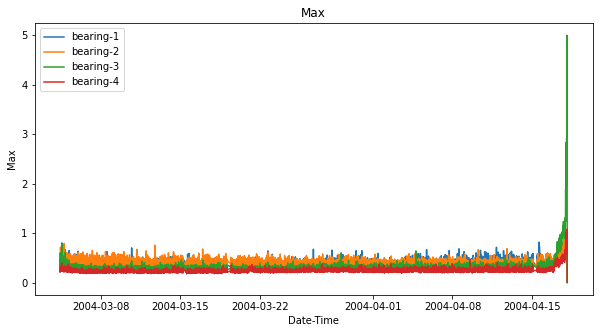

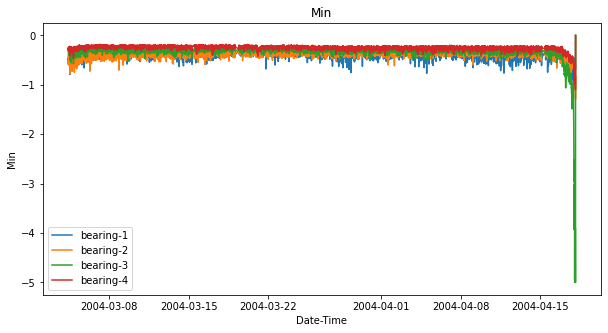

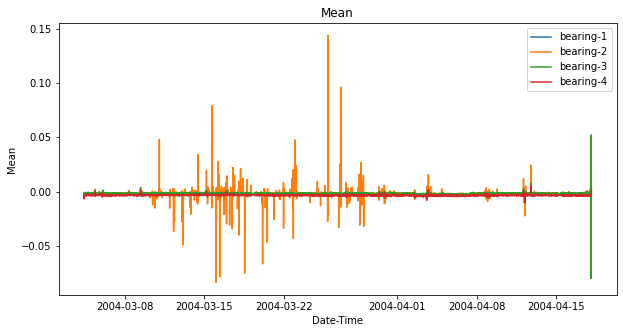

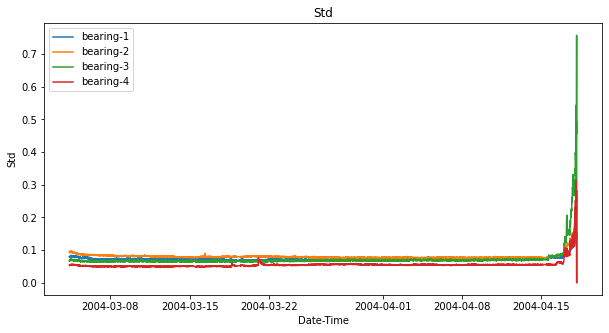

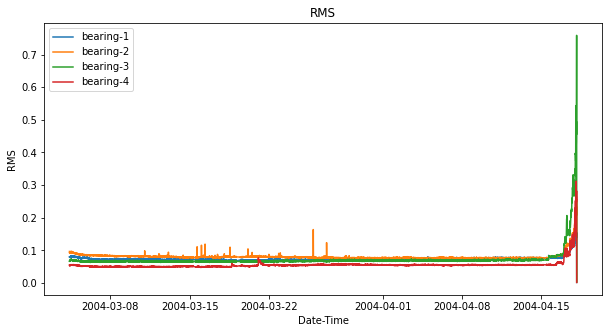

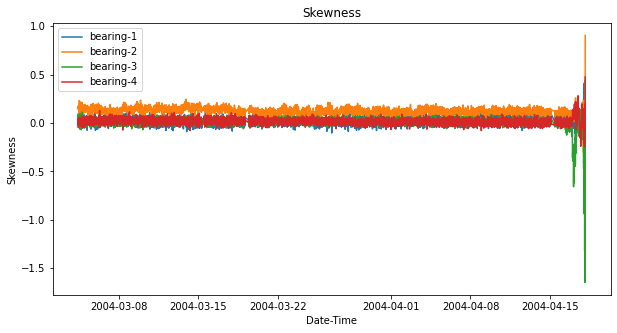

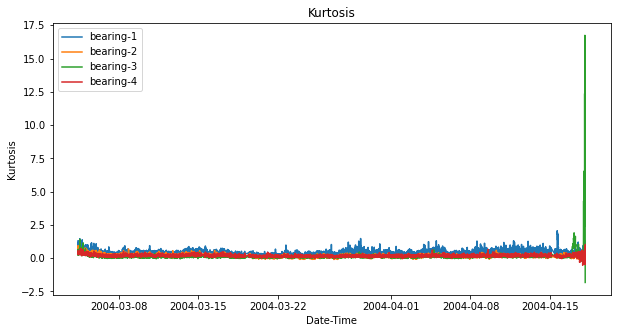

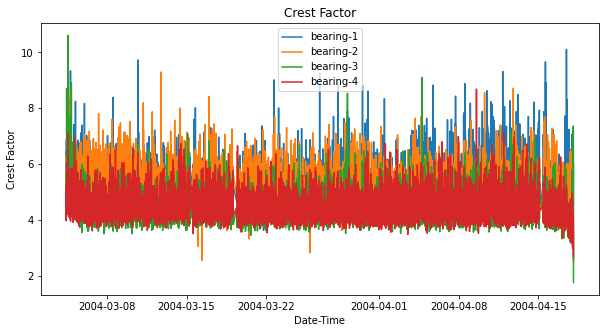

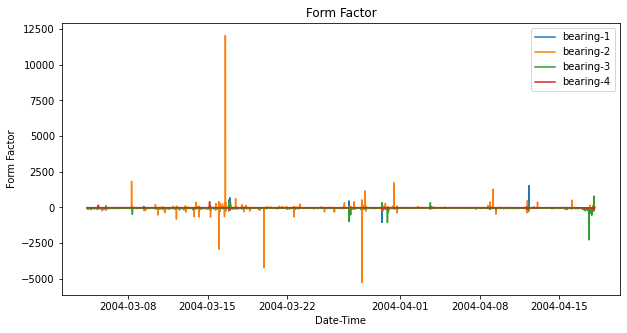

In [41]:
for col in (df1.columns):  
    
        plt.figure(figsize=(10, 5))
        plt.plot(df1.index,df1[col])
        plt.plot(df1.index,df2[col])
        plt.plot(df1.index,df3[col])
        plt.plot(df1.index,df4[col])

        plt.legend(['bearing-1','bearing-2','bearing-3','bearing-4'])

        plt.xlabel("Date-Time")
        plt.ylabel(col)
        plt.title(col)
        plt.show()

**Saving the Outer Race Fault**

In [42]:
df3

,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,Crest Factor,Form Factor
2004-03-04 09:27:00,0.361,-0.310,-0.005148,0.066192,0.066390,0.083449,0.591902,5.437565,-12.896399
2004-03-04 09:32:00,0.295,-0.295,-0.006310,0.065986,0.066285,0.011828,0.359751,4.450449,-10.505622
2004-03-04 09:42:00,0.286,-0.286,-0.001293,0.069176,0.069186,0.049056,0.213724,4.133782,-53.519544
2004-03-04 09:52:00,0.349,-0.310,-0.002280,0.068600,0.068637,0.002209,0.299035,5.084751,-30.099513
2004-03-04 10:02:00,0.388,-0.374,-0.001727,0.067449,0.067469,0.031884,0.395754,5.750781,-39.058344
...,...,...,...,...,...,...,...,...,...
2004-04-18 02:02:00,3.167,-5.000,0.017613,0.495062,0.495363,-1.648364,16.742241,6.393285,28.124430
2004-04-18 02:12:00,2.378,-3.899,-0.002114,0.454472,0.454466,-0.656841,5.707273,5.232514,-214.967877
2004-04-18 02:22:00,4.346,-5.000,-0.079840,0.584635,0.590047,-0.426006,12.660025,7.365514,-7.390347
2004-04-18 02:32:00,4.998,-5.000,0.052137,0.756990,0.758765,-0.220131,7.058920,6.587018,14.553238


In [43]:
df_orf=df3['2004-04-15 12:32:00':'2004-04-18 00:42:00']
fault=[]
for i in range (0,len(df_orf)):
    fault.append('Outer Race')

df_orf['Fault']=fault

df_orf.to_csv('outer_race_fault_test_3.csv',index=False)  
df_orf

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,Crest Factor,Form Factor,Fault
2004-04-15 12:32:00,0.315,-0.300,-0.002260,0.071999,0.072032,-0.017350,0.161074,4.373034,-31.867085,Outer Race
2004-04-15 12:42:00,0.278,-0.320,-0.000929,0.071960,0.071965,-0.020822,0.203632,3.863014,-77.468263,Outer Race
2004-04-15 12:52:00,0.403,-0.300,-0.001721,0.071967,0.071986,0.009853,0.275335,5.598312,-41.838775,Outer Race
2004-04-15 13:02:00,0.334,-0.332,-0.001242,0.070479,0.070488,0.037436,0.131765,4.738400,-56.769549,Outer Race
2004-04-15 13:12:00,0.295,-0.334,-0.002482,0.072242,0.072283,-0.030286,0.181303,4.081162,-29.120361,Outer Race
...,...,...,...,...,...,...,...,...,...,...
2004-04-18 00:02:00,2.280,-3.936,-0.001821,0.394083,0.394077,-0.416217,6.095530,5.785668,-216.407494,Outer Race
2004-04-18 00:12:00,1.750,-3.423,-0.002377,0.395931,0.395928,-0.664070,3.988261,4.419990,-166.549208,Outer Race
2004-04-18 00:22:00,2.202,-3.013,-0.004019,0.384375,0.384387,-0.150122,2.377175,5.728602,-95.651873,Outer Race
2004-04-18 00:32:00,1.824,-3.335,-0.003547,0.373875,0.373883,-0.408740,4.726666,4.878529,-105.403295,Outer Race


In [46]:
from google.colab import files
files.download('outer_race_fault_test_3.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Saving the Normal Bearing data**

In [47]:
df=df3['2003-03-04 09:27:00':'2004-04-14 00:42:00']
fault=[]
for i in range (0,len(df)):
    fault.append('Normal')
    
df['Fault']=fault

df.to_csv('NormalTest3.csv',index=False)   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [48]:
df=pd.read_csv('NormalTest3.csv')
df

,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,Crest Factor,Form Factor,Fault
0,0.361,-0.310,-0.005148,0.066192,0.066390,0.083449,0.591902,5.437565,-12.896399,Normal
1,0.295,-0.295,-0.006310,0.065986,0.066285,0.011828,0.359751,4.450449,-10.505622,Normal
2,0.286,-0.286,-0.001293,0.069176,0.069186,0.049056,0.213724,4.133782,-53.519544,Normal
3,0.349,-0.310,-0.002280,0.068600,0.068637,0.002209,0.299035,5.084751,-30.099513,Normal
4,0.388,-0.374,-0.001727,0.067449,0.067469,0.031884,0.395754,5.750781,-39.058344,Normal
...,...,...,...,...,...,...,...,...,...,...
5773,0.330,-0.288,-0.002077,0.069615,0.069644,0.024462,0.105083,4.738350,-33.528895,Normal
5774,0.286,-0.278,-0.002107,0.068991,0.069021,0.013269,0.085263,4.143644,-32.754604,Normal
5775,0.327,-0.354,-0.002355,0.071572,0.071609,-0.009357,0.161726,4.566492,-30.400991,Normal
5776,0.283,-0.283,-0.001235,0.070448,0.070457,0.030677,0.109896,4.016646,-57.072149,Normal


In [49]:
files.download('NormalTest3.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>